In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [7]:
def f(x):
    pi = 3.142
    return np.sin(pi * x)

In [9]:
x_train = np.random.uniform(-1, 1, (10000 , 2))
x_train

array([[-0.43568799,  0.78324331],
       [-0.86423219, -0.03240076],
       [-0.03007194,  0.09733932],
       ...,
       [-0.02192078, -0.47530279],
       [ 0.96591304,  0.54589736],
       [ 0.57629203, -0.26624157]])

In [11]:
y_train = f(x_train) 
y_train

array([[-0.97969443,  0.62929224],
       [-0.41339106, -0.10162744],
       [-0.09434552,  0.30109444],
       ...,
       [-0.06882066, -0.9970065 ],
       [ 0.10649158,  0.98959053],
       [ 0.9713586 , -0.74232322]])

### Problem 1

In [12]:
b_constant = np.mean(y_train, axis=1)  

In [15]:
m_linear = (y_train[:, 1] - y_train[:, 0]) / (x_train[:, 1] - x_train[:, 0])
b_linear = y_train[:, 0] - m_linear * x_train[:, 0]

avg_hypothesis_constant = round(np.mean(b_constant), 3)
avg_hypothesis_linear = f"{round(np.mean(m_linear), 3)}x + {round(np.mean(b_linear), 3)}"

print("Average Hypothesis")
print(f"Constant Model: g_hat(x) = {avg_hypothesis_constant}")

Average Hypothesis
Constant Model: g_hat(x) = -0.003


### Problem 2

In [17]:
x_vals = np.linspace(-1, 1, 100)

g_constant = np.mean(b_constant) * np.ones_like(x_vals)
g_linear = np.mean(m_linear) * x_vals + np.mean(b_linear)

bias_constant = np.mean((g_constant - f(x_vals))**2)
bias_linear = np.mean((g_linear - f(x_vals))**2)

print("Bias^2 for each model")
print(f"Constant Model Bias^2: {round(bias_constant, 3)}")
print(f"Linear Model Bias^2: {round(bias_linear, 3)}")

Bias^2 for each model
Constant Model Bias^2: 0.495
Linear Model Bias^2: 0.213


### Problem 3

In [20]:
variance_constant = np.mean((b_constant[:, None] - g_constant)**2)
variance_linear = np.mean(((m_linear[:, None] * x_vals + b_linear[:, None]) - g_linear)**2)
print("Variance for each model")
print(f"Constant Model Variance: {round(variance_constant, 3)}")
print(f"Linear Model Variance: {round(variance_linear, 3)}")

Variance for each model
Constant Model Variance: 0.253
Linear Model Variance: 1.705


### Problem 4

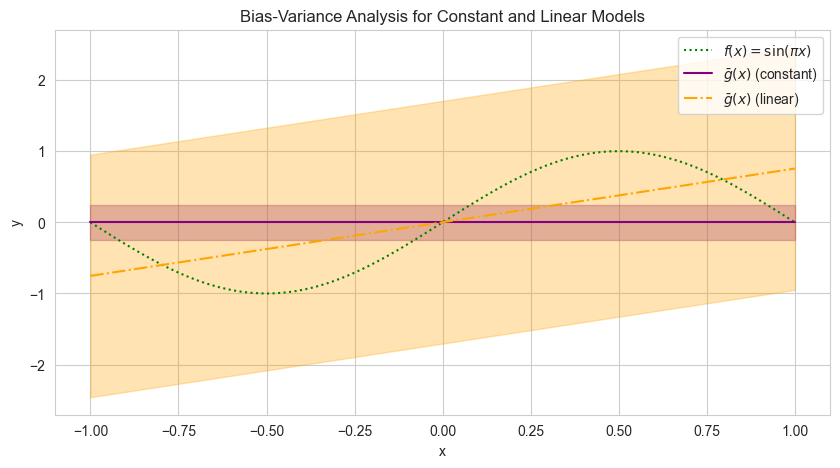

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# True function
sns.lineplot(x=x_vals, y=f(x_vals), label=r"$f(x) = \sin(\pi x)$", linestyle="dotted", color="green")

# Constant model 
sns.lineplot(x=x_vals, y=g_constant, label=r"$\bar{g}(x)$ (constant)", color="purple")
plt.fill_between(x_vals, g_constant - variance_constant, g_constant + variance_constant, alpha=0.3, color="purple")

# Linear model 
sns.lineplot(x=x_vals, y=g_linear, label=r"$\bar{g}(x)$ (linear)", linestyle="dashdot", color="orange")
plt.fill_between(x_vals, g_linear - variance_linear, g_linear + variance_linear, alpha=0.3, color="orange")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bias-Variance Analysis for Constant and Linear Models")
plt.legend()
plt.show()

##### The linear model (orange) better follows f(x) with lower bias, but has higher variance. The constant model (purple) is more stable but oversimplifies f(x) with high bias. The linear model is the better choice despite its variance.